        Date  Temperature
0 2023-01-01           15
1 2023-01-02           16
2 2023-01-03           14
3 2023-01-04           18
4 2023-01-05           17
Mean Squared Error: 1.4565394875026214
R² Score: 0.43004976575984377


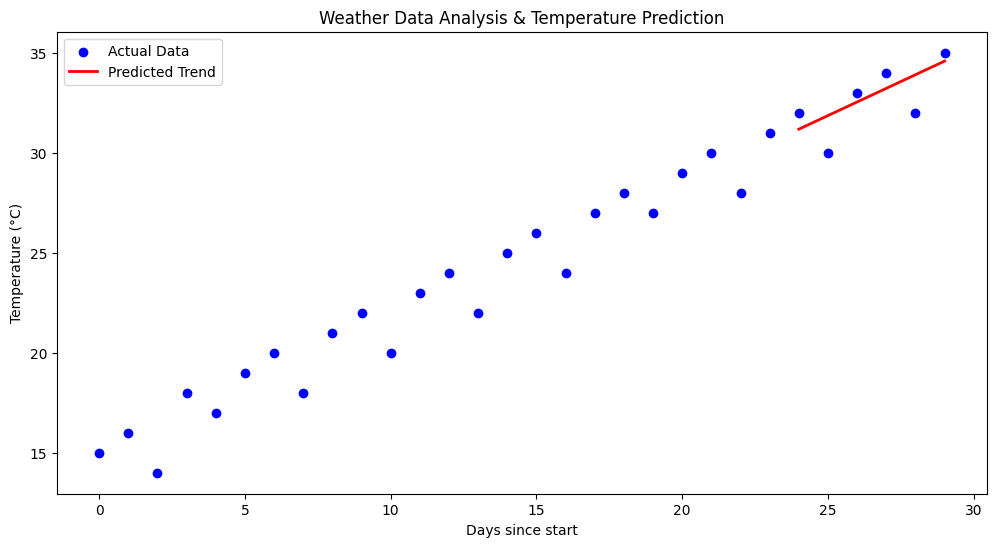


📅 Future Temperature Predictions:
2023-01-31 : 35.26 °C
2023-02-01 : 35.94 °C
2023-02-02 : 36.62 °C
2023-02-03 : 37.31 °C
2023-02-04 : 37.99 °C
2023-02-05 : 38.67 °C
2023-02-06 : 39.35 °C
2023-02-07 : 40.03 °C
2023-02-08 : 40.71 °C
2023-02-09 : 41.39 °C


In [1]:
# 📌 Weather Data Analysis and Prediction
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
data = pd.read_csv("weather.csv")
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date')
print(data.head())
# Convert date into numerical values (days since start)
data['Days'] = (data['Date'] - data['Date'].min()).dt.days

X = data[['Days']]  
y = data['Temperature'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
plt.figure(figsize=(12,6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Trend')
plt.xlabel("Days since start")
plt.ylabel("Temperature (°C)")
plt.title("Weather Data Analysis & Temperature Prediction")
plt.legend()
plt.show()
future_days = pd.DataFrame({'Days': np.arange(data['Days'].max()+1, data['Days'].max()+11)})
future_pred = model.predict(future_days)

print("\n📅 Future Temperature Predictions:")
for day, temp in zip(future_days['Days'], future_pred):
    date = data['Date'].min() + pd.Timedelta(days=int(day))
    print(f"{date.date()} : {temp:.2f} °C")
